## 코드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('data_2017.csv',engine = 'python')

In [4]:
df2 = pd.read_csv('data_2018.csv')

In [5]:
print(df1.shape[0], df2.shape[0])

1000000 1000000


In [6]:
frames = [df1, df2]
df = pd.concat(frames)

In [7]:
df.shape[0]

2000000

In [8]:
df = df.rename(columns={"연령대코드(5세단위)":"연령대 코드", 
                        "신장(5Cm단위)":"신장", 
                        "체중(5Kg단위)":"체중",
                        "식전혈당(공복혈당)":"식전혈당"})

In [9]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대 코드,시도코드,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [10]:
#필요 요소만 남김
df= df[['성별코드', '연령대 코드', '신장',
       '체중', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당']].copy()

In [11]:
df.describe()

,성별코드,연령대 코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999320e+06,1.994251e+06,1.994252e+06,1.994043e+06
mean,1.466995e+00,1.056190e+01,1.622604e+02,6.342898e+01,8.134754e+01,1.225481e+02,7.606142e+01,1.006600e+02
std,4.989096e-01,2.860501e+00,9.310089e+00,1.262693e+01,1.106285e+01,1.459186e+01,9.954033e+00,2.418251e+01
min,1.000000e+00,5.000000e+00,1.250000e+02,2.500000e+01,1.000000e+00,5.800000e+01,2.700000e+01,2.300000e+01
25%,1.000000e+00,8.000000e+00,1.550000e+02,5.500000e+01,7.450000e+01,1.120000e+02,7.000000e+01,8.900000e+01
50%,1.000000e+00,1.100000e+01,1.600000e+02,6.000000e+01,8.100000e+01,1.210000e+02,7.600000e+01,9.600000e+01
75%,2.000000e+00,1.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01,1.310000e+02,8.200000e+01,1.050000e+02
max,2.000000e+00,1.800000e+01,1.900000e+02,1.400000e+02,9.990000e+02,2.730000e+02,1.850000e+02,8.720000e+02


## null 값 정리

In [12]:
df.isnull().sum()

성별코드         0
연령대 코드       0
신장           0
체중           0
허리둘레       680
수축기혈압     5749
이완기혈압     5748
식전혈당      5957
dtype: int64

In [13]:
#식전혈당이 없을 시 드랍
df = df.loc[df['식전혈당'].notnull()]

## 혈당에 따른 당뇨여부  

In [14]:
df_diabetes = df['식전혈당'].copy()

In [15]:
#당뇨병: 공복 혈당치 126 mg/dL 이상 당뇨병의 전단계: 공복 혈당치 100 mg/dL 이상
#저혈당: 혈당치 126 mg/dL 미만
df_diabetes.loc[df_diabetes < 100] = 0
df_diabetes.loc[(df_diabetes >= 100) & (df_diabetes < 126)] = 1
df_diabetes.loc[df_diabetes >= 126] = 2

In [16]:
df['혈당'] = df_diabetes

In [17]:
df = df.drop(['식전혈당'], axis = 1)

## 복부비만

In [18]:
#비정상적인 값 배제
df = df.loc[df['허리둘레']<140]
df = df.loc[df['허리둘레']>40]

In [19]:
#국내의 복부비만 기준은 남자는 90cm 이상, 여자의 경우 85cm 이상
df_obesity = df[['허리둘레','성별코드']].copy()

df_obesity.loc[(df_obesity['허리둘레']>= 90) & (df_obesity['성별코드']==1), '복부비만'] = 1
df_obesity.loc[(df_obesity['허리둘레']>= 85) & (df_obesity['성별코드']==2), '복부비만'] = 1
df_obesity['복부비만'] = df_obesity['복부비만'].fillna(0)

In [20]:
df['복부비만'] = df_obesity['복부비만']

In [21]:
df = df.drop(['허리둘레'], axis = 1)

## BMI

In [22]:
df_weight = df[['신장', '체중']].copy()

In [23]:
#체중(kg)을 신장(m)의 제곱으로 나눈 값(체중(kg)/신장(m2))
temp = df_weight['신장']/100
df_bmi = round(df_weight['체중'] / (temp * temp), 1)

In [24]:
#세계보건기구 아시아태평양지역과 대한비만학회
#BMI < 25 kg/m2 : 저체중+정상 0
#BMI ≥ 25 kg/m2 : 과체중 1
#BMI ≥ 30 kg/m2 : 비만 2
df_bmi.loc[df_bmi < 25] = 0
df_bmi.loc[(df_bmi >= 25) & (df_bmi < 30)] = 1
df_bmi.loc[df_bmi >= 30] = 2

In [25]:
df['비만여부'] = df_bmi

In [26]:
df = df.drop(['체중', '신장'], axis = 1)

## 고혈압

In [27]:
df_pressure = df[['이완기혈압', '수축기혈압']].copy()

In [28]:
# 정상: 0 / 120~139/80~89 전단계: 1/  140~159/90~99 1기:2 / 160/100 2기:3
df_pressure.loc[(df_pressure['수축기혈압'] < 120) & (df_pressure['이완기혈압'] < 80), '고혈압 여부'] = 0
df_pressure.loc[((df_pressure['수축기혈압'] >= 120) & (df_pressure['수축기혈압'] < 140))|
                ((df_pressure['이완기혈압'] >= 80) & (df_pressure['이완기혈압'] < 90)), '고혈압 여부'] = 1
df_pressure.loc[((df_pressure['수축기혈압'] >= 140) & (df_pressure['수축기혈압'] < 160))|
                ((df_pressure['이완기혈압'] >= 90) & (df_pressure['이완기혈압'] < 99)), '고혈압 여부'] = 2
df_pressure.loc[(df_pressure['수축기혈압'] >=160) | (df_pressure['이완기혈압'] >= 100), '고혈압 여부'] = 3

In [29]:
df_pressure.isnull().sum()

이완기혈압     29
수축기혈압     29
고혈압 여부    42
dtype: int64

In [30]:
df['고혈압'] = df_pressure['고혈압 여부']

In [31]:
df = df.drop(['수축기혈압', '이완기혈압'], axis = 1)

## 최종

In [32]:
df.head()

,성별코드,연령대 코드,혈당,복부비만,비만여부,고혈압
0,1,8,0.0,1.0,1.0,1.0
1,1,7,1.0,0.0,0.0,1.0
2,1,9,0.0,1.0,1.0,1.0
3,1,11,0.0,1.0,1.0,2.0
4,1,11,1.0,0.0,0.0,1.0


In [33]:
df.isnull().sum()

성별코드       0
연령대 코드     0
혈당         0
복부비만       0
비만여부       0
고혈압       42
dtype: int64

In [34]:
df = df.loc[df['고혈압'].notnull()]

In [35]:
df.shape

(1993237, 6)

In [36]:
df.describe()

,성별코드,연령대 코드,혈당,복부비만,비만여부,고혈압
count,1.993237e+06,1.993237e+06,1.993237e+06,1.993237e+06,1.993237e+06,1.993237e+06
mean,1.466237e+00,1.054844e+01,4.595690e-01,2.394653e-01,4.224611e-01,7.671627e-01
std,4.988589e-01,2.851195e+00,6.362133e-01,4.267572e-01,5.839803e-01,7.470445e-01
min,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.000000e+00,1.300000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.000000e+00,1.800000e+01,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00


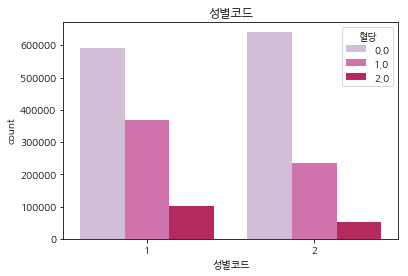

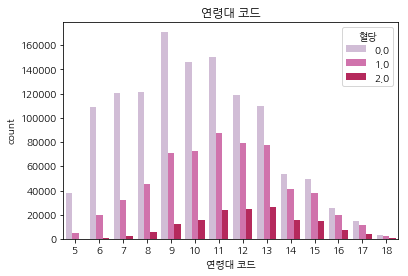

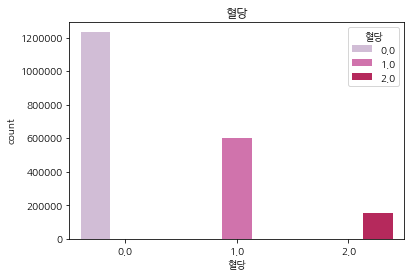

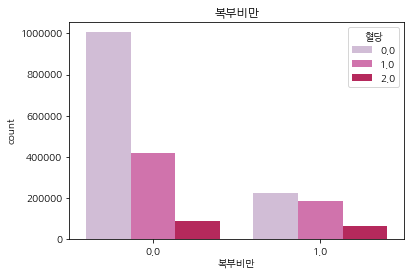

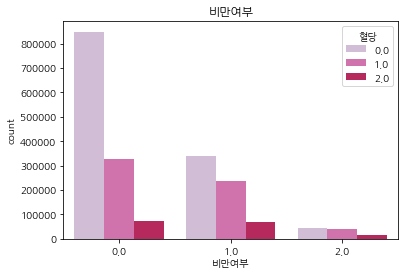

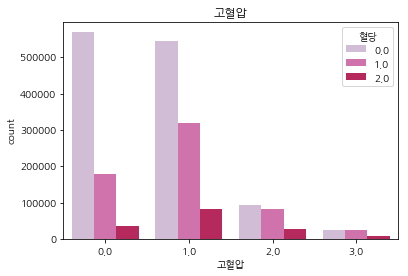

In [37]:
def get_plot(column_name):
    sns.countplot(x=column_name, hue='혈당', data=df, palette = "PuRd")
    plt.title(column_name)
    plt.show()
    
for c in df.columns:
    get_plot(c)